# 📓 Chapter 12 Notebook  
## Radiation Biology  
### *How Ionizing Radiation Interacts with Cells and Tissue*

This notebook emphasizes **conceptual understanding with visuals**, not memorization.
Most cells are “change a parameter → run → interpret.”


---
## 🧠 Learning Goals

By the end of this notebook, you will be able to:

- Define **absorbed dose (Gy)** and **dose rate**
- Understand **direct vs indirect DNA damage**
- Relate radiation dose to **cell survival**
- Interpret **linear–quadratic (LQ) survival curves**
- Understand why **fractionation** is used in radiation therapy


---
## ✅ Setup (run once)


In [ ]:
%pip install matplotlib numpy ipywidgets

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

---
## ☢️ Part 1 — Radiation Dose (Energy Deposition)

The **absorbed dose** is defined as:

$$
\text{Dose} = \frac{\text{Energy deposited}}{\text{Mass}}
$$

The SI unit is the **Gray (Gy)**:
$$
1 \text{ Gy} = 1 \text{ J/kg}
$$

Below is a simple calculation.


In [2]:
# Dose calculation
energy_J = 0.002    # joules deposited
mass_kg = 0.1       # kg of tissue

dose_Gy = energy_J / mass_kg
dose_Gy

0.02

### Try this
Change the energy or mass.
Why does small mass tissue receive a higher dose for the same energy?


---
## 🧬 Part 2 — Direct vs Indirect DNA Damage (Conceptual)

Radiation damages DNA in two main ways:

**Direct damage**
- Radiation ionizes DNA directly
- More common for densely ionizing radiation (alpha particles)

**Indirect damage**
- Radiation ionizes water → free radicals (•OH)
- Radicals diffuse and damage DNA
- Dominant for X-rays and gamma rays

We’ll visualize this idea schematically.


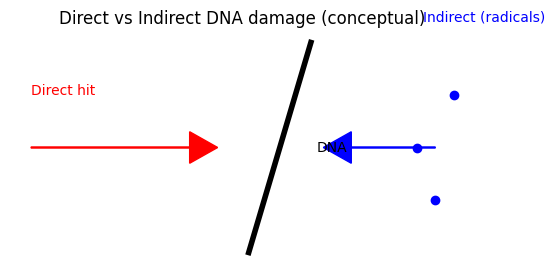

In [3]:
# Simple schematic visualization of direct vs indirect damage
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))

# DNA
plt.plot([0.45,0.55],[0.4,0.6],'k',linewidth=4)
plt.text(0.56,0.5,"DNA",va='center')

# Direct track
plt.arrow(0.1,0.5,0.3,0,head_width=0.03,length_includes_head=True,color='r')
plt.text(0.1,0.55,"Direct hit",color='r')

# Indirect radicals
plt.scatter([0.75,0.78,0.72],[0.45,0.55,0.5],color='b')
plt.arrow(0.75,0.5,-0.18,0,head_width=0.03,length_includes_head=True,color='b')
plt.text(0.73,0.62,"Indirect (radicals)",color='b')

plt.axis('off')
plt.title("Direct vs Indirect DNA damage (conceptual)")
plt.show()

---
## 📉 Part 3 — Cell Survival and Dose–Response

Cell survival typically decreases with increasing dose.

A common empirical model is the **Linear–Quadratic (LQ) model**:

$$
S(D) = e^{-(\alpha D + \beta D^2)}
$$

Where:
- $S(D)$: surviving fraction
- $D$: dose (Gy)
- $\alpha$: single-track damage
- $\beta$: double-track damage


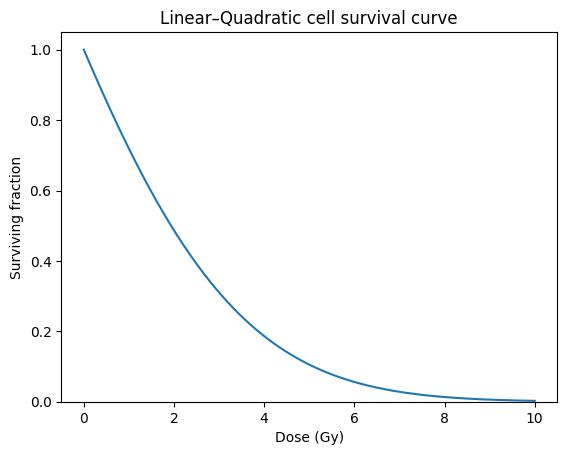

In [4]:
# LQ survival curve
D = np.linspace(0, 10, 400)   # dose in Gy
alpha = 0.3
beta = 0.03

S = np.exp(-(alpha*D + beta*D**2))

plt.plot(D, S)
plt.xlabel("Dose (Gy)")
plt.ylabel("Surviving fraction")
plt.title("Linear–Quadratic cell survival curve")
plt.ylim(0,1.05)
plt.show()

### Try this
Increase `alpha` or `beta`.
Which term dominates at **low dose**? High dose?


---
## 🔄 Part 4 — Fractionation (Why Dose is Split)

Instead of giving one large dose, radiation therapy often delivers dose in **fractions**.

We compare:
- Single dose $D$
- $n$ fractions of dose $D/n$

Total survival:
$$
S_{total} = [S(D/n)]^n
$$


In [5]:
# Compare single dose vs fractionated dose
D_total = 6.0   # Gy
n = 6           # fractions

alpha = 0.3
beta = 0.03

S_single = np.exp(-(alpha*D_total + beta*D_total**2))

D_frac = D_total / n
S_frac = np.exp(-(alpha*D_frac + beta*D_frac**2)) ** n

S_single, S_frac

(np.float64(0.056134762834133725), np.float64(0.13806923731089282))

**Interpretation:**  
Fractionation often leads to **greater cell survival** for normal tissue, while still damaging tumor cells.


---
## ⚠️ Part 5 — Deterministic vs Stochastic Effects

**Deterministic effects**
- Have a threshold dose
- Severity increases with dose
- Examples: skin burns, cataracts

**Stochastic effects**
- No clear threshold
- Probability increases with dose
- Examples: cancer induction

Below is a conceptual visualization.


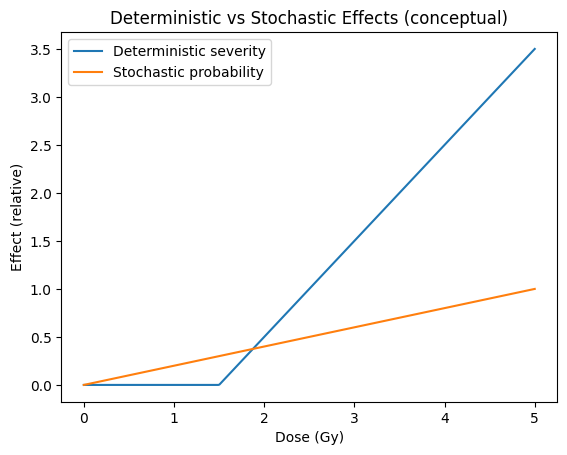

In [6]:
# Conceptual dose-effect curves
D = np.linspace(0, 5, 400)

deterministic = np.maximum(0, D-1.5)
stochastic = 0.2*D

plt.plot(D, deterministic, label="Deterministic severity")
plt.plot(D, stochastic, label="Stochastic probability")
plt.xlabel("Dose (Gy)")
plt.ylabel("Effect (relative)")
plt.title("Deterministic vs Stochastic Effects (conceptual)")
plt.legend()
plt.show()

---
## ⭐ Optional: Interactive Survival Curve Explorer

Explore how tissue radiosensitivity affects survival.
If sliders don’t work in your environment, you can skip this section.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

try:
    from ipywidgets import interact, FloatSlider
except Exception as e:
    print("ipywidgets not available. You can skip this section.")
    print("Error:", e)

def survival_demo(alpha=0.3, beta=0.03):
    D = np.linspace(0, 10, 400)
    S = np.exp(-(alpha*D + beta*D**2))
    plt.plot(D, S)
    plt.xlabel("Dose (Gy)")
    plt.ylabel("Surviving fraction")
    plt.title(f"LQ model: α={alpha:.2f}, β={beta:.3f}")
    plt.ylim(0,1.05)
    plt.show()

try:
    interact(
        survival_demo,
        alpha=FloatSlider(min=0.05, max=0.6, step=0.05, value=0.3, description="alpha"),
        beta=FloatSlider(min=0.005, max=0.08, step=0.005, value=0.03, description="beta")
    )
except Exception as e:
    print("Interactive display not available here. That's okay—skip this section.")
    print("Error:", e)

interactive(children=(FloatSlider(value=0.3, description='alpha', max=0.6, min=0.05, step=0.05), FloatSlider(v…

---
## 🧠 Big Picture Takeaways

- Radiation dose measures **energy per mass** (Gy)
- DNA damage can be **direct** or **indirect** (via free radicals)
- Cell survival decreases with dose and follows empirical dose–response curves
- The Linear–Quadratic model explains why **fractionation** matters
- Deterministic effects have thresholds; stochastic effects do not

This chapter provides the biological foundation needed for understanding radiation safety and radiation therapy.
